
# Proyecto Halterofilia



Busco realizar todo tipo de analisis en cuanto a la trata de datos con Python y resolver una serie de pregutnas realizadas al final de cada una de las fases.

El análisis se hará en dos fases:

1. **Fase 1**: Acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Se incluye información desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024


# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import missingno as msn
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

c:\Users\javier.pina\AppData\Local\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Paso 2. Cargar datos

In [ ]:
# 2019

path1 = r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final'
file1 = 'Campeonato Europeo de Halterofilia de 2019 datos original.csv'

# 2020

path2 = r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final'
file2 = 'Campeonato Europeo de Halterofilia de 2020 datos original.csv'

In [ ]:
# Unifico el path y el file para crear la ruta

ruta_completa19 = os.path.join(path1,file1)
ruta_completa19

ruta_completa20 = os.path.join(path2,file2)
ruta_completa20

'C:\\Users\\javier.pina\\Desktop\\PLAN PIÑA\\NUCLIO\\3.Limpieza de datos\\Proyecto final\\Campeonato Europeo de Halterofilia de 2020 datos original.csv'

## Paso 3. Exploración inicial

In [ ]:
# Creo una funcion con varias acciones dentro para usarla cada vez que considere necesario y asi tener algo estandarizado

def exploracion_inicial(halterofilia):
    print('Forma del dataframe:',halterofilia.shape)
    
    print('primeras 5 filas:') 
    display(halterofilia.head())

    print('Ultimas 5 filas:')
    display(halterofilia.tail())

    print('Muestra aleatoria:')
    display(halterofilia.sample(n=5, random_state = 50))
    
    print('Información general:')
    print(halterofilia.info())

    print('Estadisticas descriptivas:')
    print(halterofilia.describe())

    print('Valores nulos:')
    display(halterofilia.isna().sum())

    print('Valores duplicados:')
    display(halterofilia.duplicated().sum())

    print('Valores generales:')
    display(halterofilia.values)

## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

In [ ]:
# Leo las dos rutas que tengo como CSV y las concateno para tener un unico dataframe

df_2019 = pd.read_csv(ruta_completa19)
df_2020 = pd.read_csv(ruta_completa20)

df_conjunto = pd.concat([df_2019, df_2020], ignore_index=True) 
df_conjunto

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [ ]:
# Renombro los datos de 2020 como 2021 ya que vimos que eran los mismos

df_conjunto['Año'] = df_conjunto['Año'].replace({2020:2021})

In [ ]:
# EJCUTO LA EXPLORACION INICIAL CON MI DATAFRAME UNIFICADO (ESTO ES DEL PASO 4) PERO LO HAGO AQUI POR QUE PRIMERO QUERIA TENER LA INFO UNIFICADA

exploracion_inicial(df_conjunto)

Forma del dataframe: (40, 6)
primeras 5 filas:


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


Ultimas 5 filas:


,Eventos,Oro,Plata,Bronce,Año,Genero
35,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2021,Femenino
36,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2021,Femenino
37,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2021,Femenino
38,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2021,Femenino
39,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2021,Femenino


Muestra aleatoria:


,Eventos,Oro,Plata,Bronce,Año,Genero
31,49 kg (03.04),Monica Csengeri Rumania 86 + 103 = 189,Kristina Sobol Rusia 85 + 96 = 181,Mihaela Cambei Rumania 80 + 100 = 180,2021,Femenino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
36,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2021,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
27,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2021,Masculino


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  40 non-null     object
 1   Oro      40 non-null     object
 2   Plata    40 non-null     object
 3   Bronce   40 non-null     object
 4   Año      40 non-null     int64 
 5   Genero   40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB
None
Estadisticas descriptivas:
               Año
count    40.000000
mean   2020.000000
std       1.012739
min    2019.000000
25%    2019.000000
50%    2020.000000
75%    2021.000000
max    2021.000000
Valores nulos:


Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

Valores duplicados:


0

Valores generales:


array([['55\xa0kg (06.04)',
        'Mirco Scarantino Italia  116 + 145 = 261[n 1]\u200b',
        'Anguel Rusev Bulgaria  110 + 146 = 256[n 1]\u200b',
        'Muammer Şahin Turquía  112 + 135 = 247[n 1]\u200b', 2019,
        'Masculino'],
       ['61\xa0kg (07.04)',
        'Henadz Laptseu Bielorrusia  133 + 153 = 286',
        'Bünyamin Sezer Turquía  132 + 151 = 283',
        'Ferdi Hardal Turquía  127 + 155 = 282', 2019, 'Masculino'],
       ['67\xa0kg (08.04)', 'Bernardin Matam Francia  137 + 175 = 312',
        'Simon Brandhuber Alemania  146 + 165 = 311',
        'Goga Chjeidze Georgia  139 + 169 = 308', 2019, 'Masculino'],
       ['73\xa0kg (09.04)', 'Bozhidar Andreev Bulgaria  153 + 192 = 345',
        'Briken Calja Albania  156 + 183 = 339',
        'Vadzim Lijarad Bielorrusia  153 + 182 = 335', 2019, 'Masculino'],
       ['81\xa0kg (10.04)', 'Antonino Pizzolato Italia  155 + 201 = 356',
        'Piotr Asayonak Bielorrusia  159 + 196 = 355',
        'Ritvars Suharevs Letonia

In [ ]:
# Con esta exploracion me aseguro de ver la estructura de los datos en distintos puntos del dataframe, el tipo de datos de cada columna, veo si hay valores duplicados, nulos y sus estadisticos
# descriptivos (que en este caso no los veo que sean muy relevantes)

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [ ]:
# Con melt lo que busco es dejar las columnas fijas que necesito y las de oro,plata y bronce las melteo o fundo en medalla, dejando por otro lado la columna de atleta con los datos restantes.

df_transformado = df_conjunto.melt(
    id_vars=['Eventos','Año','Genero'],
    value_vars=['Oro','Plata','Bronce'],
    var_name='Medalla',
    value_name='Atleta'
)

df_transformado

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [ ]:
# De la columna atleta, necesito sacar mas columnas, no sabia bien como orientarlo y chat me recomendó un extract, combinandolo con lo que vimos en la penultima clase de extraer info
# Para ello creo la fecha y la extraigo de Eventos

df_transformado['Fecha'] = df_transformado['Eventos'].str.extract(r'\((\d{2}\.\d{2})\)')

# Extraigo el pais de atleta y le digo que se quede con el ultimo elemento de la lista

df_transformado['País'] = df_transformado['Atleta'].str.extract(r'([A-Za-záéíóúüñÁÉüÍÓÚÜÑ\s]+)\s+\d+\s*\+\s*\d+\s*=')
df_transformado['País'] = df_transformado['País'].str.split().str[-1]

# Extraigo el nombre y apellido

df_transformado['Nombre'] = df_transformado['Atleta'].str.extract(r'^([A-Za-zÁÉÍÓÚÜÑáăéëíóúñü]+)')
df_transformado['Apellido'] = df_transformado['Atleta'].str.extract(r'^[A-Za-zÁÉÍÓÚÜÑáéíóúñ]+\s+([A-Za-zÁÉÍÓÚÜÑáéíóúñ]+)')

# Extraigo los resultados completos, el codigo que hay dentro de extraer nos estaria sacando lo siguiente: 100 + 200 = 300, por ejemplo.

df_transformado['Resultados'] = df_transformado['Atleta'].str.extract(r'(\d+\s*\+\s*\d+\s*=\s*\d+)')

# Extraigo lo mismo de arriba pero lo agrupo por bloques con ()

df_transformado[['Arrancada', 'Dos tiempos', 'Total']] = df_transformado['Resultados'].str.extract(r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)')

# Convierto a numeros enteros ya que lo pasé a str para poder tratarlos pero realmente son numeros

df_transformado[['Arrancada', 'Dos tiempos', 'Total']] = df_transformado[['Arrancada', 'Dos tiempos', 'Total']].astype(int)
df_transformado['Eventos'] = df_transformado['Eventos'].str.replace(r'\s*\(.*?\)', '', regex=True)

df_transformado

,Eventos,Año,Genero,Medalla,Atleta,Fecha,País,Nombre,Apellido,Resultados,Arrancada,Dos tiempos,Total
0,55 kg,2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​,06.04,Italia,Mirco,Scarantino,116 + 145 = 261,116,145,261
1,61 kg,2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,07.04,Bielorrusia,Henadz,Laptseu,133 + 153 = 286,133,153,286
2,67 kg,2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,08.04,Francia,Bernardin,Matam,137 + 175 = 312,137,175,312
3,73 kg,2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,09.04,Bulgaria,Bozhidar,Andreev,153 + 192 = 345,153,192,345
4,81 kg,2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,10.04,Italia,Antonino,Pizzolato,155 + 201 = 356,155,201,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,71 kg,2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,07.04,Rumania,Raluca,Olaru,98 + 120 = 218,98,120,218
116,76 kg,2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,08.04,Rusia,Anastasiya,Romanova,111 + 132 = 243,111,132,243
117,81 kg,2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,09.04,Armenia,Liana,Guiurdzhian,98 + 129 = 227,98,129,227
118,87 kg,2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,10.04,Rusia,Daria,Riazanova,105 + 135 = 240,105,135,240


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [ ]:
# Este paso lo hice despues de este punto, pertenece al punto 8, pero tengo que realizar el cambio de fecha antes 
# porque en el siguiente paso dropeo el año y necesito sacar la fecha compuesta.

# Primero añado el año al formato fecha porque si no no me deja hacer el cambio

df_transformado['Fecha'] = df_transformado['Fecha'] + '.' + df_transformado['Año'].astype(str)

# Hago el cambio de fecha, con formato fecha

df_transformado['Fecha'] = pd.to_datetime(df_transformado['Fecha'], format='%d.%m.%Y')

In [ ]:
# Elimino las columnas que no me hacen falta, atendiendo a lo especificado en este punto y renombro la columna eventos como
# Categoria, haciendo un inplace True para que me lo guarde en el origen 

df_transformadofinal = df_transformado.drop( columns = ['Año','Atleta','Resultados'])
df_transformadofinal.rename(columns = {'Eventos':'Categoria'}, inplace= True)

## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [ ]:
# Hago la transformacion de las columnas categoria y medalla a 'category' con un astype

df_transformadofinal['Categoria'] = df_transformadofinal['Categoria'].astype('category')
df_transformadofinal['Medalla'] = df_transformadofinal['Medalla'].astype('category')

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [ ]:
# Aplico un sort.values para establecer el orden de mis datos a traves de genero, categoria y fecha en orden ascendente

df_trasformadofinal1 = df_transformadofinal.sort_values(by=['Genero','Categoria','Fecha'], ascending=[True,True,True])

In [ ]:
# Le doy el orden de columnas que se pide

df_transformadofinal2 = df_trasformadofinal1[
    ['Genero', 'Categoria', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']
]
df_transformadofinal2['Categoria'].unique().tolist() #Veo que las categorias tienen una estructura rara, procedo a hacer cambios

['+87\xa0kg',
 '45\xa0kg',
 '49\xa0kg',
 '55\xa0kg',
 '59\xa0kg',
 '64\xa0kg',
 '71\xa0kg',
 '76\xa0kg',
 '81\xa0kg',
 '81\xa0kg[n 2]\u200b',
 '87\xa0kg',
 '+109\xa0kg',
 '102\xa0kg',
 '109\xa0kg',
 '61\xa0kg',
 '67\xa0kg',
 '73\xa0kg',
 '89\xa0kg',
 '96\xa0kg']

In [ ]:
# Elimino los caracteres raros que hay dentro de categoria

df_transformadofinal2['Categoria'] = df_transformadofinal2['Categoria'].str.replace('\xa0', ' ', regex=False)
df_transformadofinal2['Categoria'] = df_transformadofinal2['Categoria'].str.replace('\u200b','',regex=False)
df_transformadofinal2['Categoria'] = df_transformadofinal2['Categoria'].str.replace('[n 2]','',regex=False)
df_transformadofinal2['Categoria'] = df_transformadofinal2['Categoria'].str.strip()

df_transformadofinal2['Categoria'].unique().tolist()

['+87 kg',
 '45 kg',
 '49 kg',
 '55 kg',
 '59 kg',
 '64 kg',
 '71 kg',
 '76 kg',
 '81 kg',
 '87 kg',
 '+109 kg',
 '102 kg',
 '109 kg',
 '61 kg',
 '67 kg',
 '73 kg',
 '89 kg',
 '96 kg']

In [ ]:
df_transformadofinal2 # Ejecuto para ver que mis datos tienen el formato correcto

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
19,Femenino,+87 kg,2019-04-13,Oro,Tatiana,Kashirina,Rusia,146,185,331
59,Femenino,+87 kg,2019-04-13,Plata,Anastasiya,Lysenko,Ucrania,120,148,268
99,Femenino,+87 kg,2019-04-13,Bronce,Emily,Campbell,Unido,115,145,260
39,Femenino,+87 kg,2021-04-11,Oro,Emily,Campbell,Unido,122,154,276
79,Femenino,+87 kg,2021-04-11,Plata,Anastasiya,Lysenko,Ucrania,116,136,252
...,...,...,...,...,...,...,...,...,...,...
46,Masculino,96 kg,2019-04-12,Plata,Yegor,Klimonov,Rusia,168,210,378
86,Masculino,96 kg,2019-04-12,Bronce,Anton,Pliesnoi,Georgia,173,204,377
26,Masculino,96 kg,2021-04-09,Oro,Anton,Pliesnoi,Georgia,180,213,393
66,Masculino,96 kg,2021-04-09,Plata,Piotr,Asayonak,Bielorrusia,172,202,374


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

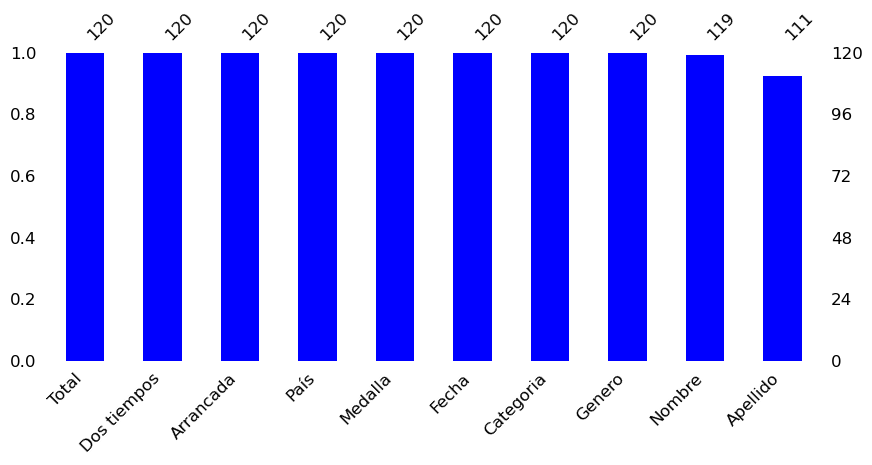

In [ ]:
# En este analisis explorartorio voy a sacar varias tablas que hemos utilizado en clase

msn.bar(df_transformadofinal2, figsize=(10, 4), fontsize=12, color='blue', sort='descending')
plt.show()

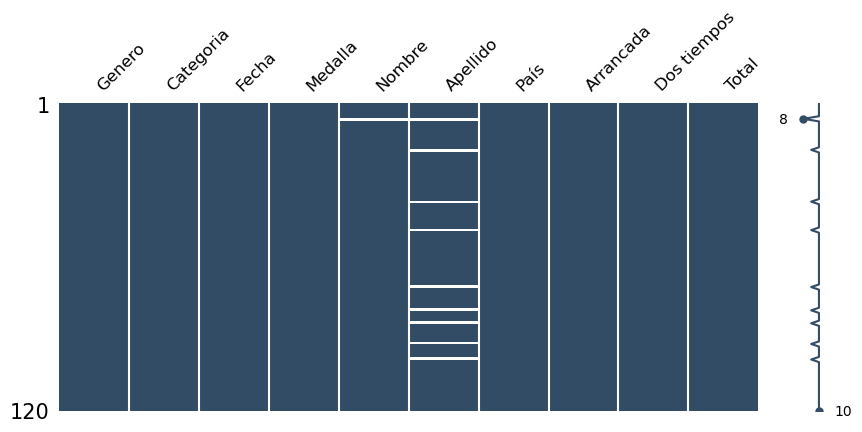

In [ ]:
msn.matrix(df_transformadofinal2, figsize=(10, 4), fontsize=12, color=(0.2, 0.3, 0.4))
plt.show()

In [ ]:
# En estas dos ultimas he sacado unas graficas para ver que hay valores NaN en apellidos y en nombre, por lo que vamos a ver cuales son

df_transformadofinal2[df_transformadofinal2['Apellido'].isna()]

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
10,Femenino,45 kg,2019-04-06,Oro,NaN,NaN,Turquía,75,88,163
12,Femenino,55 kg,2019-04-07,Oro,Joanna,NaN,Polonia,87,112,199
95,Femenino,71 kg,2019-04-10,Bronce,Mădălina,NaN,Rumania,101,114,215
77,Femenino,81 kg,2021-04-09,Plata,Gaëlle,NaN,Francia,100,131,231
107,Masculino,102 kg,2021-04-10,Bronce,Dada,NaN,Azerbaiyán,177,202,379
80,Masculino,55 kg,2019-04-06,Bronce,Muammer,NaN,Turquía,112,135,247
41,Masculino,61 kg,2019-04-07,Plata,Bünyamin,NaN,Turquía,132,151,283
22,Masculino,67 kg,2021-04-05,Oro,Muhammed,NaN,Turquía,145,178,323
23,Masculino,73 kg,2021-04-06,Oro,Daniyar,NaN,Turquía,160,181,341


In [ ]:
# ESTO ES UN PEQUEÑO INCISO (AJENO AL FLUJO LOGICO DE LA ACTIVIDAD, TOMALO COMO UNA NOTA) YA QUE VI QUE TENIA NOMBRES RAROS Y VI QUE ERA PORQUE EN MI CREACION DE NUEVAS COLUMNAS
# NO HABIA INCLUIDO CARACTERES ESPECIALES COMO ü O ă O ë QUE HACIAN QUE LOS NOMBRE ME SALIESES RAROS, TENIEDO QUE COMPROBARLO TAL Y COMO SE VE EN LA ULTIMA PARTE DE ESTA NOTA YA QUE
# LO QUE HICE FUE LO SIGUIENTE: 

# Veo que en la tabla de arriba hay nombres muy raros, por lo que procedo a comprobarlos ya que alomejor se me han separado mal en el proceso de creacion de nuevas columnas

#df_transformadofinal2['Nombre'].unique()

# Filtro por los tres que hay raros para ver si puede que sea un error de origen de los datos o es algo que ha salido de la trata de datos, veo que los demas datos tienen sentido por lo que voy
# a wikipedia para ver que ha pasado y abajo compruebo esos nombres raros que no me salen completos

#df_transformadofinal2[(df_transformadofinal2['Nombre'] == 'B') | (df_transformadofinal2['Nombre'] == 'Ga') | (df_transformadofinal2['Nombre'] == 'M')] 

In [ ]:
# Creo mi funcion grafica a partir de la que vimos en clase, donde le damos el volumen que sera como un conteo de los valores que haya en esa "Variable_analisis" que ira teniendo lo valores
# que nosotros le vayamos dando como Genero o categoria, una vez tenemos esto, en la columna X pondremos esa variable que cambiara segun nosotros le vayamos pidiendo y en volumen su
# volumen asociado, lo demas de fig es lo que vimos en clase y que vimos con miguel para editar y darle color a los graficos de manera visual

def graficar_barras_px (df_transformadofinal2, variable_analisis):
    volumen = df_transformadofinal2[variable_analisis].value_counts().reset_index()
    volumen.columns = [variable_analisis, 'volumen']
    volumen

    fig = px.bar(
        volumen,
        x=variable_analisis,
        y='volumen',
    )

    fig.update_traces(marker_color='blue')

    fig.update_layout({
    'plot_bgcolor': 'rgba(255, 255, 255, 1)',
    'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
    'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
})
    
    fig.show()

In [ ]:
# Voy a sacar algun grafico para las columnas que he considerado que puede ser utiles, como son genero, categoria y pais viendo asi la distribucion de la muestra por estas categorias.

columnas_categoricas = ['Genero', 'Categoria', 'País']

In [ ]:
# ejecuto mi funcion con las variables que he mencionado en la linea de codigo anterior

for var in columnas_categoricas:
    graficar_barras_px (df_transformadofinal2, var)

In [ ]:
# A modo de resumen podemos ver que la distribucion de la muestras por genero es igual, que las categorias de 55 y 81 kg son las que mas valores acumulan y que Rusia es el pais con mayor
# numero de representantes seguido de Armenia y Bulgaria

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [ ]:
# Hago un goupby por medalla y pais, y hago un count de medalla, una vez lo tengo estructuro por el tipo de medalla y obtengo mi resultado

medallas_ganadas = df_transformadofinal2.groupby(['País','Medalla']).size().unstack()
tabla_resultado = medallas_ganadas.reindex(columns =['Oro','Plata','Bronce'])
display(tabla_resultado)

Medalla,Oro,Plata,Bronce
País,,,
Albania,0,1,1
Alemania,1,1,0
Armenia,4,3,7
Austria,0,0,1
Azerbaiyán,1,0,1
Bielorrusia,3,3,3
Bulgaria,4,5,1
Bélgica,0,1,1
España,0,1,0


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [ ]:
# Hago un goupby por genero y pais, y hago un count de medalla, una vez lo tengo hago la diferencia entre masculino y femenino y saco la menor diferencia

medallas_por_genero = df_transformadofinal2.groupby(['País','Genero'])['Medalla'].count().unstack()
medallas_por_genero['Diferencia'] = (medallas_por_genero['Femenino'].fillna(0) - medallas_por_genero['Masculino'].fillna(0)).abs()
Mayor_equidad = medallas_por_genero['Diferencia'].idxmin()

print('El pais que ha logrado mayor equidad es',Mayor_equidad)

El pais que ha logrado mayor equidad es Alemania


In [ ]:
# Aunque sale alemania (por el orden alfabetico) realmente son 3 paises los que tienen diferencia 0

equilibrados = medallas_por_genero.sort_values(by='Diferencia').head(3)
equilibrados

Genero,Femenino,Masculino,Diferencia
País,,,
Alemania,1.0,1.0,0.0
Azerbaiyán,1.0,1.0,0.0
Moldavia,1.0,1.0,0.0


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [ ]:
# Hago un goupby por genero y pais, y hago la media del total, una vez lo tengo hago la diferencia entre masculino y femenino y saco la mayor diferencia

Puntos_por_genero = df_transformadofinal2.groupby(['País','Genero'])['Total'].mean().unstack()
Puntos_por_genero['Diferencia'] = (Puntos_por_genero['Femenino'].fillna(0) - Puntos_por_genero['Masculino'].fillna(0)).abs()
Maximo_puntos = Puntos_por_genero['Diferencia'].idxmax()

print('El pais con menor diferencia entre el promedio de puntos totales y conseguidos por atletas es',Maximo_puntos)

El pais con menor diferencia entre el promedio de puntos totales y conseguidos por atletas es Georgia


# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [ ]:
#Importo las librerias necesarias para el webscraping

from IPython.display import HTML
import requests
from bs4 import BeautifulSoup
import os

## Paso 2. Cargar datos

In [ ]:
# Importamos las urls y a traves de requets las cargamos 

url1 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019'
url2 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021'
url3 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022'
url4 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023'
url5 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'

page1 = requests.get(url1)
page2 = requests.get(url2)
page3 = requests.get(url3)
page4 = requests.get(url4)
page5 = requests.get(url5)


In [ ]:
# Me aseguro de que mis requets no me dan algun tipo de error de los que vimos

print(page1.status_code)
print(page2.status_code)
print(page3.status_code)
print(page4.status_code)
print(page5.status_code)

# Como en todos me sale 200, significa que no ha habido errore en mi extracción

200
200
200
200
200


In [ ]:
# Utilizo soup para poder acceder a nuestros datos

soup1 = BeautifulSoup(page1.text,'lxml')
soup2 = BeautifulSoup(page2.text,'lxml')
soup3 = BeautifulSoup(page3.text,'lxml')
soup4 = BeautifulSoup(page4.text,'lxml')
soup5 = BeautifulSoup(page5.text,'lxml')


In [ ]:
# Hago un ejemplo de como acceder a los datos y buscar por ejemplo donde se encuentra la tabla

soup1.find_all('tr')
soup1.find_all('table', class_ = 'wikitable sortable jquery-tablesorter')

[]

In [ ]:
# Adapto a mis datos a el código visto en clase de webscraping, importando los datos a excel ya que me resulta mas facil trabajar asi, ya que estoy mas familiarizado
# por lo que, literalmente, replico lo mismo que hiciste en clase

path = r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final'


list_columnas_nuevas = ['Evento', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']

lista_urls = [url1, url2, url3, url4, url5]

diccionario_datos= {}
for url in lista_urls:
    año = url.split('_')[-1]
    print(año)
    lista_datos = pd.read_html(url)
    for pos, df in enumerate(lista_datos):

        # Nos quedamos con las tablas cuya primera columna sea "Evento"

        lista_columnas = df.columns.tolist()

        #if lista_columnas[0] == 'Evento':

        if 'Evento' in lista_columnas:
             print(f'Posicion {pos}')
             df['año'] = año

             #df['Evento']

             condicion_genero = df['Evento'].iloc[0][0:2] == '45'
             if condicion_genero:
                 genero = 'Femenino'
             else:
                 genero = 'Masculino'
             df['genero'] = genero

             df.columns = list_columnas_nuevas
             diccionario_datos[f'{año}_{genero}'] = df

             file = f'{año}_{genero}.xlsx'
             print(file)
             ruta_exportacion = os.path.join(path, file)

             #df.to_excel(ruta_exportacion)
            
             df.to_excel(ruta_exportacion, index = False)



2019
Posicion 5
2019_Masculino.xlsx
Posicion 6
2019_Femenino.xlsx
2021
Posicion 2
2021_Masculino.xlsx
Posicion 3
2021_Femenino.xlsx
2022
Posicion 2
2022_Masculino.xlsx
Posicion 3
2022_Femenino.xlsx
2023
Posicion 2
2023_Masculino.xlsx
Posicion 3
2023_Femenino.xlsx
2024
Posicion 2
2024_Masculino.xlsx
Posicion 3
2024_Femenino.xlsx


In [ ]:
# Importo las dos librerias que ya tenia hecha de la primera parte (para ahorrar tiempo de masculino y femenino) y cargo las restantes

ruta_completa19f = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2019_Femenino.xlsx')
ruta_completa19m = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2019_Masculino.xlsx')
ruta_completa21f = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2021_Femenino.xlsx')
ruta_completa21m = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2021_Masculino.xlsx')

#Una vez he leido los datos de la primer parte, proceso a leer los de la segunda

ruta_completa22f = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2022_Femenino.xlsx')
ruta_completa22m = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2022_Masculino.xlsx')
ruta_completa23f = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2023_Femenino.xlsx')
ruta_completa23m = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2023_Masculino.xlsx')
ruta_completa24f = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2024_Femenino.xlsx')
ruta_completa24m = pd.read_excel(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\3.Limpieza de datos\Proyecto final\2024_Masculino.xlsx')

# Creo mi ruta definitiva con todos los datos cargados

rutacompletadefinitiva = pd.concat([ruta_completa19f,ruta_completa21f,ruta_completa19m,ruta_completa21m,ruta_completa22f,ruta_completa23f,ruta_completa24f,ruta_completa22m,ruta_completa23m,ruta_completa24m], ignore_index=True) 

In [ ]:
rutacompletadefinitiva

,Evento,Oro,Plata,Bronce,Año,Genero
0,45 kg (06.04),Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,Ivana Petrova Bulgaria 69 + 89 = 158[n 1]​,Yuliya Asayonak Bielorrusia 69 + 81 = 150[n 1]​,2019,Femenino
1,49 kg (06.04),Elena Andrieș Rumania 87 + 103 = 190,Kristina Sobol Rusia 85 + 95 = 180,Giorgia Russo Italia 75 + 103 = 178,2019,Femenino
2,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
3,59 kg (08.04),Rebeka Koha Letonia 101 + 120 = 221,Tatiana Aleyeva Rusia 94 + 120 = 214,Alexandra Kozlova Rusia 96 + 117 = 213,2019,Femenino
4,64 kg (09.04),Loredana Toma Rumania 111 + 128 = 239,Irina Lepșa Rumania 102 + 127 = 229,Zoe Smith Reino Unido 96 + 128 = 224,2019,Femenino
...,...,...,...,...,...,...
95,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,2024,Masculino
96,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,2024,Masculino
97,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,2024,Masculino
98,109 kg (19.02),Dadaş Dadaşbəyli Azerbaiyán 176 + 212 = 388,Jristo Jristov Bulgaria 175 + 205 = 380,Matthäus Hofmann Alemania 172 + 206 = 378,2024,Masculino


## Paso 3. Exploración inicial

In [ ]:
# Para estos procesos, voy a replicar las acciones llevadas en la primera parte pero con nuestro nuevo dataframe

exploracion_inicial(rutacompletadefinitiva)

Forma del dataframe: (100, 6)
primeras 5 filas:


,Evento,Oro,Plata,Bronce,Año,Genero
0,45 kg (06.04),Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,Ivana Petrova Bulgaria 69 + 89 = 158[n 1]​,Yuliya Asayonak Bielorrusia 69 + 81 = 150[n 1]​,2019,Femenino
1,49 kg (06.04),Elena Andrieș Rumania 87 + 103 = 190,Kristina Sobol Rusia 85 + 95 = 180,Giorgia Russo Italia 75 + 103 = 178,2019,Femenino
2,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
3,59 kg (08.04),Rebeka Koha Letonia 101 + 120 = 221,Tatiana Aleyeva Rusia 94 + 120 = 214,Alexandra Kozlova Rusia 96 + 117 = 213,2019,Femenino
4,64 kg (09.04),Loredana Toma Rumania 111 + 128 = 239,Irina Lepșa Rumania 102 + 127 = 229,Zoe Smith Reino Unido 96 + 128 = 224,2019,Femenino


Ultimas 5 filas:


,Evento,Oro,Plata,Bronce,Año,Genero
95,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,2024,Masculino
96,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,2024,Masculino
97,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,2024,Masculino
98,109 kg (19.02),Dadaş Dadaşbəyli Azerbaiyán 176 + 212 = 388,Jristo Jristov Bulgaria 175 + 205 = 380,Matthäus Hofmann Alemania 172 + 206 = 378,2024,Masculino
99,+109 kg (20.02),Varazdat Lalayan Armenia 205 + 250 = 455,Simon Martirosian Armenia 190 + 247 = 437,Eduard Ziaziulin AIN[a 1]​ 195 + 241 = 436,2024,Masculino


Muestra aleatoria:


,Evento,Oro,Plata,Bronce,Año,Genero
80,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,2023,Masculino
79,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,2022,Masculino
25,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2021,Femenino
39,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2021,Masculino


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Evento  100 non-null    object
 1   Oro     100 non-null    object
 2   Plata   100 non-null    object
 3   Bronce  100 non-null    object
 4   Año     100 non-null    int64 
 5   Genero  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None
Estadisticas descriptivas:
               Año
count   100.000000
mean   2021.800000
std       1.729132
min    2019.000000
25%    2021.000000
50%    2022.000000
75%    2023.000000
max    2024.000000
Valores nulos:


Evento    0
Oro       0
Plata     0
Bronce    0
Año       0
Genero    0
dtype: int64

Valores duplicados:


0

Valores generales:


array([['45\xa0kg (06.04)',
        'Şaziye Erdoğan Turquía  75 + 88 = 163[n 1]\u200b',
        'Ivana Petrova Bulgaria  69 + 89 = 158[n 1]\u200b',
        'Yuliya Asayonak Bielorrusia  69 + 81 = 150[n 1]\u200b', 2019,
        'Femenino'],
       ['49\xa0kg (06.04)', 'Elena Andrieș Rumania  87 + 103 = 190',
        'Kristina Sobol Rusia  85 + 95 = 180',
        'Giorgia Russo Italia  75 + 103 = 178', 2019, 'Femenino'],
       ['55\xa0kg (07.04)', 'Joanna Łochowska Polonia  87 + 112 = 199',
        'Svetlana Yershova Rusia  90 + 108 = 198',
        'Kristina Novitskaya Rusia  85 + 105 = 190', 2019, 'Femenino'],
       ['59\xa0kg (08.04)', 'Rebeka Koha Letonia  101 + 120 = 221',
        'Tatiana Aleyeva Rusia  94 + 120 = 214',
        'Alexandra Kozlova Rusia  96 + 117 = 213', 2019, 'Femenino'],
       ['64\xa0kg (09.04)', 'Loredana Toma Rumania  111 + 128 = 239',
        'Irina Lepșa Rumania  102 + 127 = 229',
        'Zoe Smith Reino Unido  96 + 128 = 224', 2019, 'Femenino'],
       ['

In [ ]:
# Vemos lo mismo que en el analisis pasados, vemos 3 extractos de datos (principio, final y aleatorio), vemos que no hay nulos ni duplicados y el tipo de datos por columna

## Paso 4. Crear un único dataframe con los datos de 2019, 2020, 2021, 2022, 2023 y 2024

In [ ]:
# Ya lo he creado previamente pero lo que voy a hacer es renombrarlo ya que el nombre que tiene es un poco confuso o no la sintaxis con que de normal se trabaja

dffinal = rutacompletadefinitiva

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [ ]:
# Cambio la estructura tal y como pide el enunciado siguiendo el ejemplo de la primera parte

dffinal2 = dffinal.melt(
    id_vars= ['Evento','Año','Genero'],
    value_vars= ['Oro','Plata','Bronce'],
    var_name='Medalla',
    value_name='Atleta'
)

# Hago un rename de Evento a Eventos

dffinal2 = dffinal2.rename(columns = {'Evento':'Eventos'})

dffinal2

,Eventos,Año,Genero,Medalla,Atleta
0,45 kg (06.04),2019,Femenino,Oro,Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​
1,49 kg (06.04),2019,Femenino,Oro,Elena Andrieș Rumania 87 + 103 = 190
2,55 kg (07.04),2019,Femenino,Oro,Joanna Łochowska Polonia 87 + 112 = 199
3,59 kg (08.04),2019,Femenino,Oro,Rebeka Koha Letonia 101 + 120 = 221
4,64 kg (09.04),2019,Femenino,Oro,Loredana Toma Rumania 111 + 128 = 239
...,...,...,...,...,...
295,89 kg (17.02),2024,Masculino,Bronce,Marin Robu Moldavia 171+ 207 = 378
296,96 kg (18.02),2024,Masculino,Bronce,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360
297,102 kg (19.02),2024,Masculino,Bronce,Garik Karapetian Armenia 182 + 212 = 394
298,109 kg (19.02),2024,Masculino,Bronce,Matthäus Hofmann Alemania 172 + 206 = 378


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [ ]:
# Para la creacion de columnas vamos a seguir la misma estrucutura que en el aprtado 1 ya que los datos presentan la misma estrucutura, sacandolo de Atleta y Eventos

dffinal2['Fecha'] = dffinal2['Eventos'].str.extract(r'\((\d{2}\.\d{2})\)')

# Una vez que ya he extraido la fecha vamos con el pais, una vez lo tenemos sacamos el ultimo valor que tenemos, seria nombre junto con pais pues selecionamos el ultimo

dffinal2['País'] = dffinal2['Atleta'].str.extract(r'([A-Za-záéíóúüñÁÉÍÓÚÜÑ\s]+)\s+\d+\s*\+\s*\d+\s*=')
dffinal2['País'] = dffinal2['País'].str.split().str[-1]

# Extraigo el nombre y apellido

dffinal2['Nombre'] = dffinal2['Atleta'].str.extract(r'^([A-Za-zÁÉÍÓÚÜÑáăéëíóúñü]+)')
dffinal2['Apellido'] = dffinal2['Atleta'].str.extract(r'^[A-Za-zÁÉÍÓÚÜÑáéíóúñ]+\s+([A-Za-zÁÉÍÓÚÜÑáéíóúñ]+)')

#Extraemos los resultados 

dffinal2['Resultados'] = dffinal2['Atleta'].str.extract(r'(\d+\s*\+\s*\d+\s*=\s*\d+)') 

# Extraemos las columnas de arrancada y demas con el mismo codigo que el de arriba pero separandolo por bloques

dffinal2[['Arrancada','Dos tiempos','Total']] = dffinal2['Resultados'].str.extract(r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)') #Le digo que me de un numeros(\d+) y espacios o ceros varias veces (\s*)

# Convierto los numeros de arrancada y demas a enteros ya que he pasado a str para hacer los extract

dffinal2[['Arrancada', 'Dos tiempos', 'Total']] = dffinal2[['Arrancada', 'Dos tiempos', 'Total']].astype(int)
dffinal2['Eventos'] = dffinal2['Eventos'].str.replace(r'\s*\(.*?\)', '', regex=True) # Elimino textos entre parentesis y los sustituyo por nada ('')

dffinal2


,Eventos,Año,Genero,Medalla,Atleta,Fecha,País,Nombre,Apellido,Resultados,Arrancada,Dos tiempos,Total
0,45 kg,2019,Femenino,Oro,Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,06.04,Turquía,NaN,NaN,75 + 88 = 163,75,88,163
1,49 kg,2019,Femenino,Oro,Elena Andrieș Rumania 87 + 103 = 190,06.04,Rumania,Elena,Andrie,87 + 103 = 190,87,103,190
2,55 kg,2019,Femenino,Oro,Joanna Łochowska Polonia 87 + 112 = 199,07.04,Polonia,Joanna,NaN,87 + 112 = 199,87,112,199
3,59 kg,2019,Femenino,Oro,Rebeka Koha Letonia 101 + 120 = 221,08.04,Letonia,Rebeka,Koha,101 + 120 = 221,101,120,221
4,64 kg,2019,Femenino,Oro,Loredana Toma Rumania 111 + 128 = 239,09.04,Rumania,Loredana,Toma,111 + 128 = 239,111,128,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,89 kg,2024,Masculino,Bronce,Marin Robu Moldavia 171+ 207 = 378,17.02,Moldavia,Marin,Robu,171+ 207 = 378,171,207,378
296,96 kg,2024,Masculino,Bronce,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,18.02,NaN,Pavel,Jadasevich,165 + 195 = 360,165,195,360
297,102 kg,2024,Masculino,Bronce,Garik Karapetian Armenia 182 + 212 = 394,19.02,Armenia,Garik,Karapetian,182 + 212 = 394,182,212,394
298,109 kg,2024,Masculino,Bronce,Matthäus Hofmann Alemania 172 + 206 = 378,19.02,Alemania,Matth,NaN,172 + 206 = 378,172,206,378


In [ ]:
# Junto el año dentro de Fecha, ya que si no no podria aplicar lo del paso 7

dffinal2['Fecha'] = dffinal2['Fecha'] + '.' + dffinal2['Año'].astype(str)

dffinal2

,Eventos,Año,Genero,Medalla,Atleta,Fecha,País,Nombre,Apellido,Resultados,Arrancada,Dos tiempos,Total
0,45 kg,2019,Femenino,Oro,Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,06.04.2019,Turquía,NaN,NaN,75 + 88 = 163,75,88,163
1,49 kg,2019,Femenino,Oro,Elena Andrieș Rumania 87 + 103 = 190,06.04.2019,Rumania,Elena,Andrie,87 + 103 = 190,87,103,190
2,55 kg,2019,Femenino,Oro,Joanna Łochowska Polonia 87 + 112 = 199,07.04.2019,Polonia,Joanna,NaN,87 + 112 = 199,87,112,199
3,59 kg,2019,Femenino,Oro,Rebeka Koha Letonia 101 + 120 = 221,08.04.2019,Letonia,Rebeka,Koha,101 + 120 = 221,101,120,221
4,64 kg,2019,Femenino,Oro,Loredana Toma Rumania 111 + 128 = 239,09.04.2019,Rumania,Loredana,Toma,111 + 128 = 239,111,128,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,89 kg,2024,Masculino,Bronce,Marin Robu Moldavia 171+ 207 = 378,17.02.2024,Moldavia,Marin,Robu,171+ 207 = 378,171,207,378
296,96 kg,2024,Masculino,Bronce,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,18.02.2024,NaN,Pavel,Jadasevich,165 + 195 = 360,165,195,360
297,102 kg,2024,Masculino,Bronce,Garik Karapetian Armenia 182 + 212 = 394,19.02.2024,Armenia,Garik,Karapetian,182 + 212 = 394,182,212,394
298,109 kg,2024,Masculino,Bronce,Matthäus Hofmann Alemania 172 + 206 = 378,19.02.2024,Alemania,Matth,NaN,172 + 206 = 378,172,206,378


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [ ]:
# Hacemos un rename de Categoria

dffinal2 = dffinal2.rename(columns = {'Eventos':'Categoría'})

In [ ]:
# Modificamos el orden 

dffinal2 = dffinal2[['Genero','Categoría','Fecha','Medalla','Nombre','Apellido','País','Arrancada','Dos tiempos','Total']]

dffinal2

# No sabia si eliminar los Nan de apellidos pero por miedo a que se me descuadrase la muestra no lo hago a pesar de no tener este dato, ya que no es de lo mas relevantes.

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45 kg,06.04.2019,Oro,NaN,NaN,Turquía,75,88,163
1,Femenino,49 kg,06.04.2019,Oro,Elena,Andrie,Rumania,87,103,190
2,Femenino,55 kg,07.04.2019,Oro,Joanna,NaN,Polonia,87,112,199
3,Femenino,59 kg,08.04.2019,Oro,Rebeka,Koha,Letonia,101,120,221
4,Femenino,64 kg,09.04.2019,Oro,Loredana,Toma,Rumania,111,128,239
...,...,...,...,...,...,...,...,...,...,...
295,Masculino,89 kg,17.02.2024,Bronce,Marin,Robu,Moldavia,171,207,378
296,Masculino,96 kg,18.02.2024,Bronce,Pavel,Jadasevich,NaN,165,195,360
297,Masculino,102 kg,19.02.2024,Bronce,Garik,Karapetian,Armenia,182,212,394
298,Masculino,109 kg,19.02.2024,Bronce,Matth,NaN,Alemania,172,206,378


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [ ]:
# Aplico los cambios de formato

dffinal2['Categoría'] = dffinal2['Categoría'].astype('category')
dffinal2['Fecha'] = pd.to_datetime(dffinal2['Fecha'], format='%d.%m.%Y')
dffinal2['Medalla'] = dffinal2['Medalla'].astype('category')

# Se que mi arrancada, dos tiempos y total, es int32 y pones int64, pero creo que esto es por algo del ordenador (no recuerdo a que se debia pero nos lo explico Leandro)

dffinal2.dtypes

Genero                 object
Categoría            category
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int32
Dos tiempos             int32
Total                   int32
dtype: object

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [ ]:
# Antes de ordenar por Categoria, debo eliminar los caracteres especiales, como lo hice en la primera parte

dffinal2['Categoría'].unique().tolist()

dffinal2['Categoría'] = dffinal2['Categoría'].str.replace('\xa0','', regex=False)
dffinal2['Categoría'] = dffinal2['Categoría'].str.replace('\u200b','', regex=False)
dffinal2['Categoría'] = dffinal2['Categoría'].str.replace('[n 2]','', regex=False)
dffinal2['Categoría'] = dffinal2['Categoría'].str.strip() # Evito que se me queden espacios al principio y al final
dffinal2

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45kg,2019-04-06,Oro,NaN,NaN,Turquía,75,88,163
1,Femenino,49kg,2019-04-06,Oro,Elena,Andrie,Rumania,87,103,190
2,Femenino,55kg,2019-04-07,Oro,Joanna,NaN,Polonia,87,112,199
3,Femenino,59kg,2019-04-08,Oro,Rebeka,Koha,Letonia,101,120,221
4,Femenino,64kg,2019-04-09,Oro,Loredana,Toma,Rumania,111,128,239
...,...,...,...,...,...,...,...,...,...,...
295,Masculino,89kg,2024-02-17,Bronce,Marin,Robu,Moldavia,171,207,378
296,Masculino,96kg,2024-02-18,Bronce,Pavel,Jadasevich,NaN,165,195,360
297,Masculino,102kg,2024-02-19,Bronce,Garik,Karapetian,Armenia,182,212,394
298,Masculino,109kg,2024-02-19,Bronce,Matth,NaN,Alemania,172,206,378


In [ ]:
# Le cambio el nombre para no machacar tanto dffinal2, y ordeno poor Genero, categoria y Fecha

dffinal3 = dffinal2.sort_values(by=['Genero','Categoría','Fecha'], ascending=[True,True,True])
dffinal3

# En categoria los primeros que me salen son +87kg pero es debido que en la ordenacion, interpreta que ese simbolo va a antes que un numero.

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
9,Femenino,+87kg,2019-04-13,Oro,Tatiana,Kashirina,Rusia,146,185,331
109,Femenino,+87kg,2019-04-13,Plata,Anastasiya,Lysenko,Ucrania,120,148,268
209,Femenino,+87kg,2019-04-13,Bronce,Emily,Campbell,Unido,115,145,260
19,Femenino,+87kg,2021-04-11,Oro,Emily,Campbell,Unido,122,154,276
119,Femenino,+87kg,2021-04-11,Plata,Anastasiya,Lysenko,Ucrania,116,136,252
...,...,...,...,...,...,...,...,...,...,...
186,Masculino,96kg,2023-04-21,Plata,Ara,Aghanian,Armenia,165,199,364
286,Masculino,96kg,2023-04-21,Bronce,Cristiano,Ficco,Italia,165,198,363
96,Masculino,96kg,2024-02-18,Oro,Hakob,Mkrtchian,Armenia,166,209,375
196,Masculino,96kg,2024-02-18,Plata,Davit,Hovhannisian,Armenia,169,205,374


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

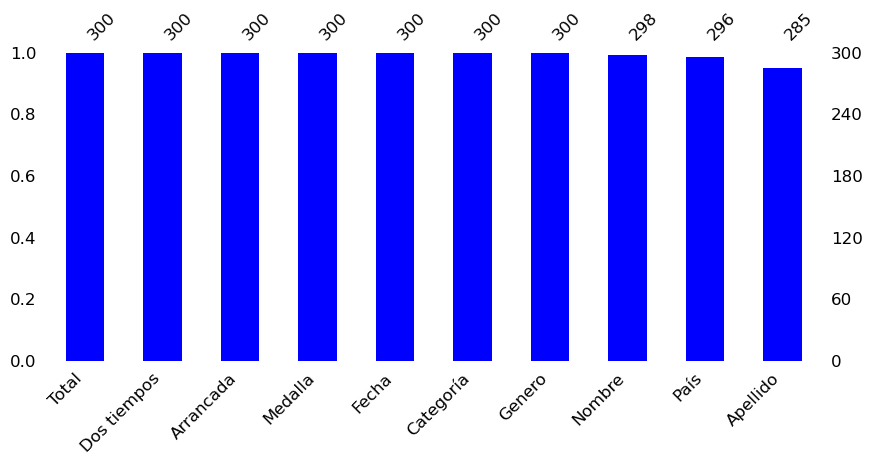

In [ ]:
# Replico el proceso de la parte 1 ya que de los ejemplos que vimos en clase creo que pueden ser los mas adecuados, podria hacer boxplot, violiplot y demas
# tal y como aprendimos con Miguel y en alguna clase hemos hecho alguna grafica de estas para una columna en concreto, pero prefiero hacer algo mas basico
# y generico ya que si no el ejercicio seria larguisimo.

msn.bar(dffinal3, figsize=(10, 4), fontsize=12, color='blue', sort='descending')
plt.show()

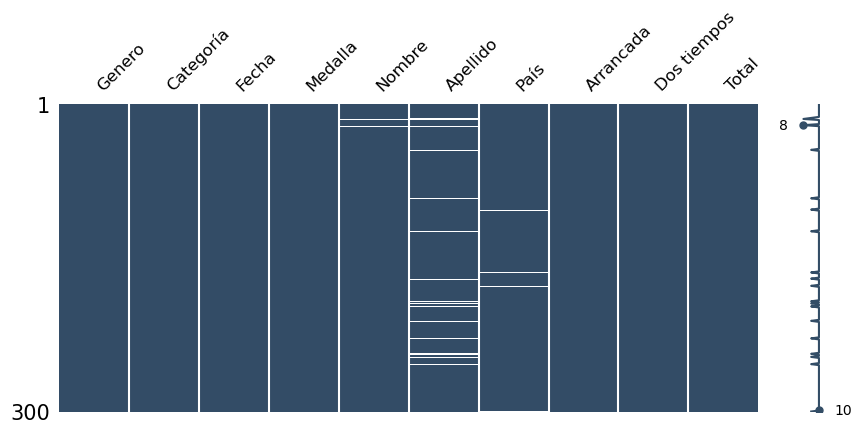

In [ ]:
msn.matrix(dffinal3, figsize=(10, 4), fontsize=12, color=(0.2, 0.3, 0.4))
plt.show()

In [ ]:
# En estas dos ultimas he sacado unas graficas para ver que hay valores NaN en apellidos y en nombre, por lo que vamos a ver cuales son, tal y como hicimos en la primera parte de la practica
# pero en esta ya he corregido los nombre previamente

dffinal3[dffinal3['Apellido'].isna()]

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
269,Femenino,+87kg,2024-02-20,Bronce,Fatmagül,NaN,Turquía,107,131,238
0,Femenino,45kg,2019-04-06,Oro,NaN,NaN,Turquía,75,88,163
40,Femenino,45kg,2022-05-28,Oro,NaN,NaN,Turquía,73,90,163
2,Femenino,55kg,2019-04-07,Oro,Joanna,NaN,Polonia,87,112,199
205,Femenino,71kg,2019-04-10,Bronce,Mădălina,NaN,Rumania,101,114,215
117,Femenino,81kg,2021-04-09,Plata,Gaëlle,NaN,Francia,100,131,231
237,Masculino,102kg,2021-04-10,Bronce,Dada,NaN,Azerbaiyán,177,202,379
98,Masculino,109kg,2024-02-19,Oro,Dada,NaN,Azerbaiyán,176,212,388
298,Masculino,109kg,2024-02-19,Bronce,Matth,NaN,Alemania,172,206,378
220,Masculino,55kg,2019-04-06,Bronce,Muammer,NaN,Turquía,112,135,247


In [ ]:
# Sacamos los graficos generales de genero, categoria y pais para nuestro nuevo dataframe

columnas_categoricas2 = ['Genero', 'Categoría', 'País']

for var in columnas_categoricas2:
    graficar_barras_px (dffinal3, var)

In [ ]:
# A modo de resumen podemos ver que la distribucion de la muestras por genero es igual, que las categorias de 55 y 81 kg siguen siendo las que mas valores acumulan y 
# que Armenia es el pais con mayor numero de representantes seguido de Turquia y Bulgaria

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [ ]:
# Voy a agrupar por pais y medadlla y a partir de aqui le digo que mis columnas se llamen Oro, Plata y bronce creando la columna que se ve abajo

medallas_ganadas2 = dffinal3.groupby(['País','Medalla']).size().unstack()
medallas_ganadas2 = medallas_ganadas2.reindex(columns =['Oro','Plata','Bronce'])
display(medallas_ganadas2)

Medalla,Oro,Plata,Bronce
País,,,
Albania,1,2,1
Alemania,1,3,3
Armenia,14,13,17
Austria,0,0,2
Azerbaiyán,2,0,1
Bielorrusia,3,3,3
Bulgaria,15,8,5
Bélgica,0,2,2
España,0,5,5


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [ ]:
# Esta parte me resulto complicada ya que el fillna no me ejecutaba igual que en la primera parte, asi que agrupe por pais y genero sacando el total de medallas
# cambie los Nan por 0 y despues creé la nueva columna de diferencia, pidiendole que, en absolutos, me diera cual era quien menos diferencia presentaba entre ambas columnas

medallas_por_genero2 = dffinal3.groupby(['País','Genero'])['Medalla'].count().unstack()
medallas_por_genero2['Femenino'] = medallas_por_genero2['Femenino'].fillna(0)
medallas_por_genero2['Masculino'] = medallas_por_genero2['Masculino'].fillna(0)
medallas_por_genero2['Diferencia']= (medallas_por_genero2['Femenino'] - medallas_por_genero2['Masculino']).abs()
medallas_por_genero3 = medallas_por_genero2['Diferencia'].idxmin()
medallas_por_genero3

'Alemania'

In [ ]:
# Compruebo que no haya mas paises como paso en la parte 1 del ejercicio, pero veo que si, asi que la solucion es Alemania, Azerbaiyan y Moldavia

equilibrados2 = medallas_por_genero2.sort_values(by='Diferencia').head(3)
equilibrados

Genero,Femenino,Masculino,Diferencia
País,,,
Alemania,1.0,1.0,0.0
Azerbaiyán,1.0,1.0,0.0
Moldavia,1.0,1.0,0.0


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [ ]:
# Hago el mismo procedimiento que arriba, hago mi agrupacion, sustituyo los Nan, creo la tabla diferencia y le pido cual es el la menor diferencia

menordiferencia = dffinal3.groupby(['País','Genero'])['Total'].mean().unstack()
menordiferencia['Femenino'] = menordiferencia['Femenino'].fillna(0)
menordiferencia['Masculino'] = menordiferencia['Masculino'].fillna(0)
menordiferencia['Diferencia'] = menordiferencia['Femenino'] - menordiferencia['Masculino']
menordiferencia['Diferencia'].head(3) # Hago un Head para asegurarme que no pasa como en la primera pregunta y veo que no
menordiferencia = menordiferencia['Diferencia'].idxmin()

print('El pais que ha conseguido una menor diferencia en promedio de puntos ha conseguido es',menordiferencia)

El pais que ha conseguido una menor diferencia en promedio de puntos ha conseguido es Armenia
